[Hyper parameter tuning in NN using Keras](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)

#### Keras Library:
* Keras is a Python library for deep learning that can run on top of both **Theano** or **TensorFlow**, two powerful Python libraries for fast numerical computing created and released by **Facebook** and Google, respectively.

#### Construction of Deep Learning Models using Keras:
1. Define your model: create a Sequential model and add layers.
2. Compile your model: specify loss function and optimizers and call the .compile() function.
3. Fit your model: train the model on data by calling the .fit() function.
4. Make predictions: use the model to generate predictions on new data by calling functions such as .evaluate() or .predict().

#### Epoch: 
* The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset
* One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches.

#### Batch Size:
* let’s say we have 1000 training samples and you want to set up a batch_size equal to 100. 
* The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. 
* Next, it takes the second 100 samples (from 101st to 200th) and trains the network again.

#### Tuning the Hyperparameters using Cross Validation
* Now instead of trying different values by hand, we will use GridSearchCV from Scikit-Learn to try out several values for our hyperparameters and compare the results.

* To do cross-validation with keras we will use the wrappers for the Scikit-Learn API. They provide a way to use Sequential Keras models (single-input only) as part of your Scikit-Learn workflow.

* There are two wrappers available:
  * **keras.wrappers.scikit_learn.KerasClassifier(build_fn=None, **sk_params)**, which implements the Scikit-Learn classifier interface,

  * **keras.wrappers.scikit_learn.KerasRegressor(build_fn=None, **sk_params)**, which implements the Scikit-Learn regressor interface.

In [63]:
# Importing libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [33]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [34]:
# Getting the input data
from keras.datasets import mnist
# mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

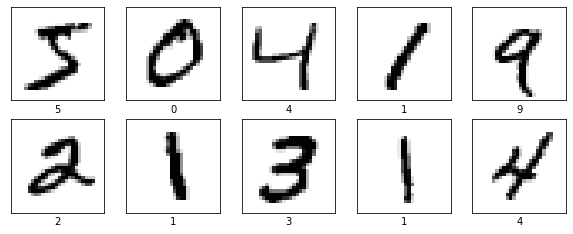

In [35]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary) # plt.cm.binary to convert the images to black & white
    plt.xlabel(y_train[i])

#### Preprocessing the data:
* flattening
  * First we need to make the 2D image arrays into 1D (flatten them). We can either perform this by using array reshaping with numpy.reshape() or the keras' method for this: a layer called tf.keras.layers.Flatten which transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1D-array of 28 * 28 = 784 pixels.
* normalization
* one hot encoding

In [36]:
# normalize the data: max=255, min = 0
x_train, x_test = x_train / 255.0, x_test / 255.0

# reshape the data into 1D vectors
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

num_classes = 10

# Check the column length
x_train.shape[1]

784

In [37]:
# before one hot encoding
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [38]:
# Convert class vectors to binary class matrices
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [39]:
# after one hot encoding
y_train[:20]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)



---
### Hyper parameter tuning of Optimizer -- SGD


---







* learning rate - controls the weight at the end of each batch
  * Learning rate is updated as per, 
  ```
  lr=lr×1/(1+decay∗epoch)
  ```
* momentum - controls how much to let the previous update influence the current weight update. It helps in smoothing the process (curve) of weight optimization. In SGD, we are required to set the B(beta) value
* decay - indicates the learning rate decay over each update 
* nesterov - takes the value “True” or “False” depending on if we want to apply Nesterov momentum.

##### Intial values: lr=0.01, decay=1e-6, momentum=0.9, and nesterov=True.

In [40]:
# Setting initial parameters
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
batch_size = int(input_dim/100)

sgd = SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

In [41]:
x_train.shape[1]

784

[Dropout to avoid overfitting](https://www.youtube.com/watch?v=lcI8ukTUEbo)
##### Usually we put a dropout layer after hidden layer

[Kernel_initializer is weight initialization methods](https://datascience.stackexchange.com/questions/37378/what-are-kernel-initializers-and-what-is-their-significance)

In [42]:
## Building the NN artitechture

# build the model
input_dim = x_train.shape[1] # 784

# Weights will be taken from uniform distribution
lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', input_dim = input_dim)) # 784 neurons
# This is the first dense layer, not the input layer.
# This layer has 64 neurons and each neuron is prepared to take inputs from input_dim number of neurons

lr_model.add(Dropout(0.1)) # to overcome the problem of overfitting

lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu)) # second dense or hidden layer

lr_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax)) #output layer

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [ ]:
%%time
# Fit the model

lr_model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

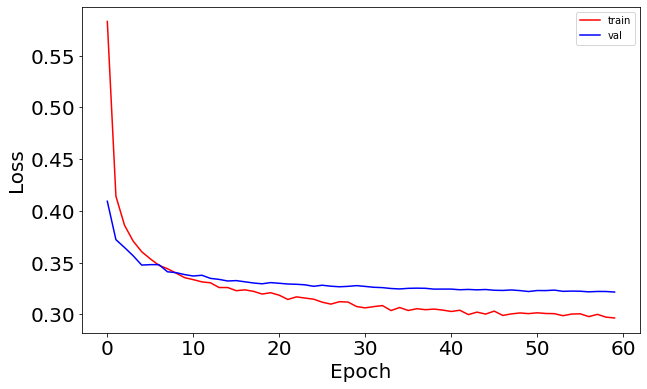

In [46]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

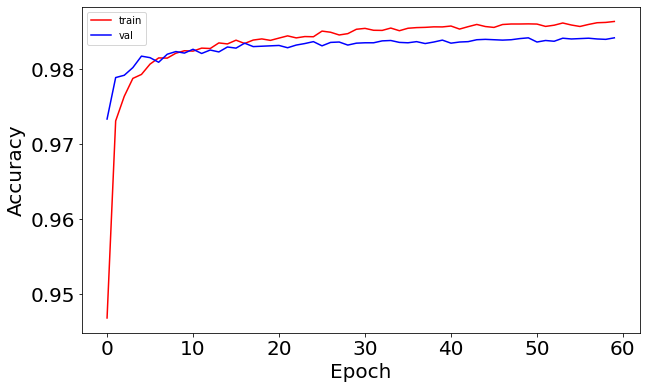

In [47]:
# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

#### Customizing the learning rate, by changing it in each epoch using LearningRateScheduler

In [59]:
# solution
epochs = 2
learning_rate = 0.1 # initial learning rate
decay_rate = 0.1
momentum = 0.8

# define the optimizer function
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [60]:
# Defining the architecture of NN

input_dim = x_train.shape[1]
num_classes = 10
batch_size = 1

# build the model
exponential_decay_model = Sequential()
exponential_decay_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', input_dim = input_dim))
exponential_decay_model.add(Dropout(0.1))
exponential_decay_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
exponential_decay_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
exponential_decay_model.compile(loss='categorical_crossentropy', 
                                optimizer=sgd, 
                                metrics=['acc'])

In [61]:
# define the learning rate change customization function 
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate

In [62]:
%%time
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

# you invoke the LearningRateScheduler during the .fit() phase
exponential_decay_model_history = exponential_decay_model.fit(x_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks_list,
                                    verbose=1,
                                    validation_data=(x_test, y_test))

Epoch 1/2
60000/60000 [==============================] - 86s 1ms/step - loss: 0.6458 - acc: 0.7991 - val_loss: 0.4811 - val_acc: 0.8586
Epoch 2/2
60000/60000 [==============================] - 81s 1ms/step - loss: 0.5174 - acc: 0.8469 - val_loss: 0.4490 - val_acc: 0.8683
CPU times: user 3min 15s, sys: 14.8 s, total: 3min 30s
Wall time: 2min 46s


In [53]:
# check on the variables that can show me the learning rate decay
exponential_decay_model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

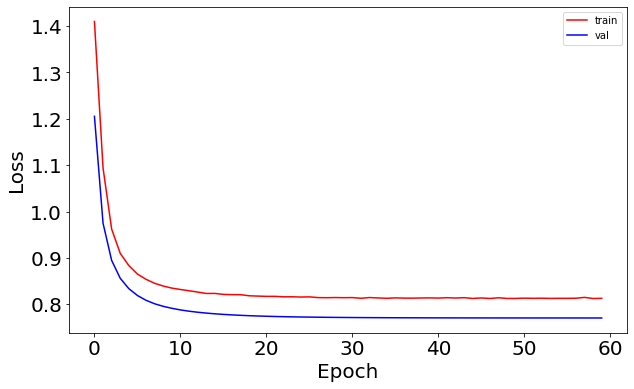

In [57]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(exponential_decay_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(exponential_decay_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

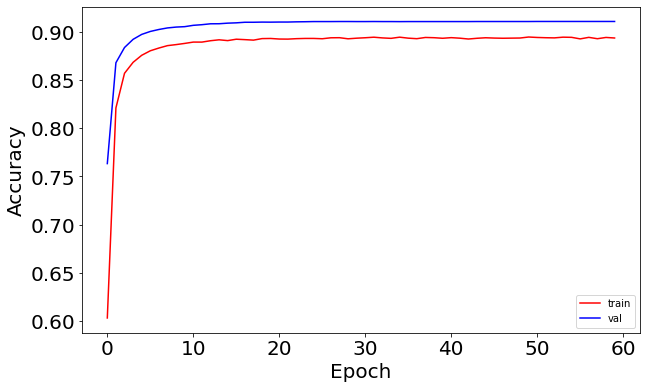

In [58]:
# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(exponential_decay_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(exponential_decay_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

#### Observations: developing a learning rate scheduler can be a helpful way to improve neural network performance and smoothen the process of weight optimization



---


## Hyper Parameter Tunings of Keras Parameters


---





### Tuning Weight initializations

In [64]:
# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='sgd'
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()

    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=784)) # first dense/hidden layer
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax)) # output layer

    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
    return model

In [65]:
%%time
seed = 7
numpy.random.seed(seed)
batch_size = 600 # as 60000 is the total number of sample
epochs = 10 

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode = init_mode)
grid = GridSearchCV(estimator = model_CV, param_grid = param_grid, n_jobs = -1, cv = 3)

grid_result = grid.fit(x_train, y_train)

Epoch 1/10
100/100 [==============================] - 1s 8ms/step - loss: 1.9987 - accuracy: 0.3331
Epoch 2/10
100/100 [==============================] - 1s 8ms/step - loss: 1.4104 - accuracy: 0.5899
Epoch 3/10
100/100 [==============================] - 1s 8ms/step - loss: 1.0622 - accuracy: 0.6841
Epoch 4/10
100/100 [==============================] - 1s 8ms/step - loss: 0.8827 - accuracy: 0.7342
Epoch 5/10
100/100 [==============================] - 1s 7ms/step - loss: 0.7826 - accuracy: 0.7619
Epoch 6/10
100/100 [==============================] - 1s 8ms/step - loss: 0.7091 - accuracy: 0.7837
Epoch 7/10
100/100 [==============================] - 1s 8ms/step - loss: 0.6626 - accuracy: 0.7974
Epoch 8/10
100/100 [==============================] - 1s 7ms/step - loss: 0.6198 - accuracy: 0.8139
Epoch 9/10
100/100 [==============================] - 1s 7ms/step - loss: 0.5894 - accuracy: 0.8226
Epoch 10/10
100/100 [==============================] - 1s 7ms/step - loss: 0.5661 - accuracy: 0.8299

In [67]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

## For this case: he_uniform turns out as the best weight initializer

Best Accuracy for 0.859166661898295 using {'init_mode': 'he_uniform'}
 mean=0.2475, std=0.08258 using {'init_mode': 'uniform'}
 mean=0.8379, std=0.00192 using {'init_mode': 'lecun_uniform'}
 mean=0.4847, std=0.0475 using {'init_mode': 'normal'}
 mean=0.1124, std=0.002416 using {'init_mode': 'zero'}
 mean=0.8409, std=0.00725 using {'init_mode': 'glorot_normal'}
 mean=0.8477, std=0.001394 using {'init_mode': 'glorot_uniform'}
 mean=0.8574, std=0.004401 using {'init_mode': 'he_normal'}
 mean=0.8592, std=0.007448 using {'init_mode': 'he_uniform'}


### Hyper parameter tuning the optimizer and loss functions
* The goal of optimization is to efficiently calculate the parameters/weights that minimize this loss function.
* Loss functions
  * MSE (for regression)
  * categorical cross-entropy (for classification)
  * binary cross entropy (for classification)

In [68]:
# Importing necessary packages
import numpy
import pandas as pd

from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings('ignore')



In [69]:
# loading data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing to convert the value between [0,1]
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [70]:
# Function to create model for KerasClassifier
def create_my_model():
  # defining keras model
  keras_model = Sequential() # initializing model
  keras_model.add(tf.keras.layers.Flatten())
  # keras_model.add(Dense(12, input_dim=8, activation='relu)) --> incase the input was from some file with 8 features
  keras_model.add(Dense(120, activation='relu')) # hidden layer
  keras_model.add(Dense(10, activation='sigmoid')) # sigmoid is useful for classifcation problems; output layer

  # compiling the model
  keras_model.compile(optimizer='adam', # other optimizer - SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
                loss='sparse_categorical_crossentropy', # how will we calculate our "error." Neural network aims to minimize loss.
                metrics = ['accuracy'])
  
  return keras_model

In [ ]:
## creating model
model = KerasClassifier(build_fn = create_my_model)

#### Optimizing Batch_size and epochs

In [ ]:
param_grid = {'batch_size': [500, 1000, 10000, 5000, 25000], 'epochs': [20, 50, 75, 100]}

grid_model = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, cv=3)
grid_result = grid_model.fit(x_train, y_train)

In [ ]:
# summarizing results
print(grid_result.best_score_)
print()
print(grid_result.best_params_)
print(grid_result.best_estimator_)

0.9691999951998392

{'batch_size': 500, 'epochs': 100}


In [ ]:
epochs = grid_result.best_params_['epochs']
batch_size = grid_result.best_params_['batch_size']

#### Optimizing **optimizer function**

In [ ]:
# Function to create model for KerasClassifier
def create_my_model(optimizer='adam'):
  # defining keras model
  keras_model = Sequential() # initializing model
  keras_model.add(tf.keras.layers.Flatten())
  # keras_model.add(Dense(12, input_dim=8, activation='relu)) --> incase the input was from some file with 8 features
  keras_model.add(Dense(120, activation='relu')) # hidden layer
  keras_model.add(Dense(10, activation='sigmoid')) # sigmoid is useful for classifcation problems; output layer

  # compiling the model
  keras_model.compile(optimizer= optimizer, # other optimizer - SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
                loss='sparse_categorical_crossentropy', # how will we calculate our "error." Neural network aims to minimize loss.
                metrics = ['accuracy'])
  
  return keras_model

In [ ]:
## creating model
model = KerasClassifier(build_fn = create_my_model, epochs = epochs, batch_size = batch_size)

In [ ]:
param_grid = {'optimizer': ['SGD', 'Adadelta', 'RMSprop', 'Adagrad', 'Adam']}

grid_model = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, cv=3)
grid_result = grid_model.fit(x_train, y_train)

In [ ]:
# summarizing results
print(grid_result.best_score_)
print()
print(grid_result.best_params_)
print(grid_result.best_estimator_)

0.9695333242416382

{'optimizer': 'RMSprop'}


#### Saving Neural Network Model to JSON¶
* The Hierarchical Data Format (HDF5) is a data storage format for storing large arrays of data including values for the weights in a neural network. We can install HDF5 Python module: pip install h5py

* Keras gives us the ability to describe and save any model using the JSON format

In [ ]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# save weights to HDF5
model.save_weights("model.h5")
print("Model saved")

# when you want to retrieve the model: load json and create model
json_file = open('model.json', 'r')
saved_model = json_file.read()
# close the file as good practice
json_file.close()
model_from_json = model_from_json(saved_model)
# load weights into new model
model_from_json.load_weights("model.h5")
print("Model loaded")